In [75]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [76]:
# Dependencies
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

#Connect to SQL database
conn = psycopg2.connect(
    database="SQL_Employee",
    user="postgres",
    password="postgres")

In [77]:
# Salaries df
salaries = pd.read_sql("SELECT * FROM salaries", conn)
salaries

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


In [78]:
# Titles df
titles = pd.read_sql("SELECT * FROM titles", conn)
titles

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [79]:
# Employees df
employees = pd.read_sql("SELECT * FROM employees", conn)
employees

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,11/18/1954,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1/30/1958,Berry,Babb,F,1992-03-21
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1991-01-18
...,...,...,...,...,...,...,...
300019,464231,s0001,8/14/1958,Constantino,Eastman,M,1988-10-28
300020,255832,e0002,5/8/1955,Yuping,Dayang,F,1995-02-26
300021,76671,s0001,6/9/1959,Ortrud,Plessier,M,1988-02-24
300022,264920,s0001,9/22/1959,Percy,Samarati,F,1994-09-08


In [80]:
# Combine salary and employees
salaries_employees = pd.merge(salaries, employees, how = 'inner', on = 'emp_no')
salaries_employees

,emp_no,salary,emp_title,birth_date,first_name,last_name,sex,hire_date
0,10001,60117,e0003,9/2/1953,Georgi,Facello,M,1986-06-26
1,10002,65828,s0001,6/2/1964,Bezalel,Simmel,F,1985-11-21
2,10003,40006,e0003,12/3/1959,Parto,Bamford,M,1986-08-28
3,10004,40054,e0003,5/1/1954,Chirstian,Koblick,M,1986-12-01
4,10005,78228,s0001,1/21/1955,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...,...,...
300019,499995,40000,e0002,9/24/1958,Dekang,Lichtner,F,1993-01-12
300020,499996,58058,e0003,3/7/1953,Zito,Baaz,M,1990-09-27
300021,499997,49597,e0003,8/3/1961,Berhard,Lenart,M,1986-04-21
300022,499998,40000,s0001,9/5/1956,Patricia,Breugel,M,1993-10-13


In [81]:
# Combine salary, employees and titles 
sal_emp_tit = salaries_employees.merge(titles, left_on = "emp_title", right_on = "title_id")
sal_emp_tit

,emp_no,salary,emp_title,birth_date,first_name,last_name,sex,hire_date,title_id,title
0,10001,60117,e0003,9/2/1953,Georgi,Facello,M,1986-06-26,e0003,Senior Engineer
1,10003,40006,e0003,12/3/1959,Parto,Bamford,M,1986-08-28,e0003,Senior Engineer
2,10004,40054,e0003,5/1/1954,Chirstian,Koblick,M,1986-12-01,e0003,Senior Engineer
3,10006,40000,e0003,4/20/1953,Anneke,Preusig,F,1989-06-02,e0003,Senior Engineer
4,10009,60929,e0003,4/19/1952,Sumant,Peac,F,1985-02-18,e0003,Senior Engineer
...,...,...,...,...,...,...,...,...,...,...
300019,111534,48077,m0001,6/27/1952,Hilary,Kambil,F,1988-01-31,m0001,Manager
300020,111692,40000,m0001,10/5/1954,Tonny,Butterworth,F,1985-01-01,m0001,Manager
300021,111784,40000,m0001,6/14/1956,Marjo,Giarratana,F,1988-02-12,m0001,Manager
300022,111877,53846,m0001,10/18/1962,Xiaobin,Spinelli,F,1991-08-17,m0001,Manager


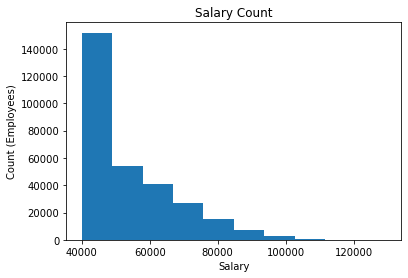

In [82]:
# Salary histogram
plt.hist(sal_emp_tit['salary'])
plt.xlabel('Salary')
plt.ylabel('Count (Employees)')
plt.title('Salary Count');

In [83]:
# Data Frame containing job titles and their average salary
df = pd.DataFrame(sal_emp_tit.groupby(sal_emp_tit.title).mean())['salary']
df

title
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Staff                 58465.382850
Technique Leader      48582.896092
Name: salary, dtype: float64

Text(0.5, 0, 'Titles')

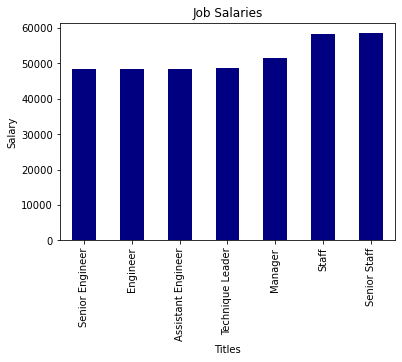

In [84]:
# Job Salary Bar Graph
df = df.sort_values()
ax = df.plot.bar(title='Job Salaries', colormap='jet')
ax.set_ylabel('Salary')
ax.set_xlabel('Titles')

In [85]:
# My employee number
my_number = sal_emp_tit[sal_emp_tit['emp_no'] == 499942]
my_number

,emp_no,salary,emp_title,birth_date,first_name,last_name,sex,hire_date,title_id,title
299999,499942,40000,e0004,1/10/1963,April,Foolsday,F,1997-02-10,e0004,Technique Leader
